# Quantum Phase Estimation with Qiskit

Quantum Phase Estimation is one of the most important quantum algorithms. It serves as a very important building block for many quantum algorithms. It is used when it is desired to obtain an eigenvalue of a certain Operator. For example, Quantum Phase Estimation is used to extract the Energy (eigenvalue) of a Hamiltonian (Operator); or to obtain the period into Shor's algorithm, for example.

But, a very important aspect to keep in mind is that Quantum Phase Estimation algorithm, or Phase Estimation algorithm, is always going to be used into other quantum algorithm. As it does not have sense by itself.

QPE algorithm contains the Quantum Fourier Transform and the inverse Quantum Fourier Transform because of geometry/phase reasons.

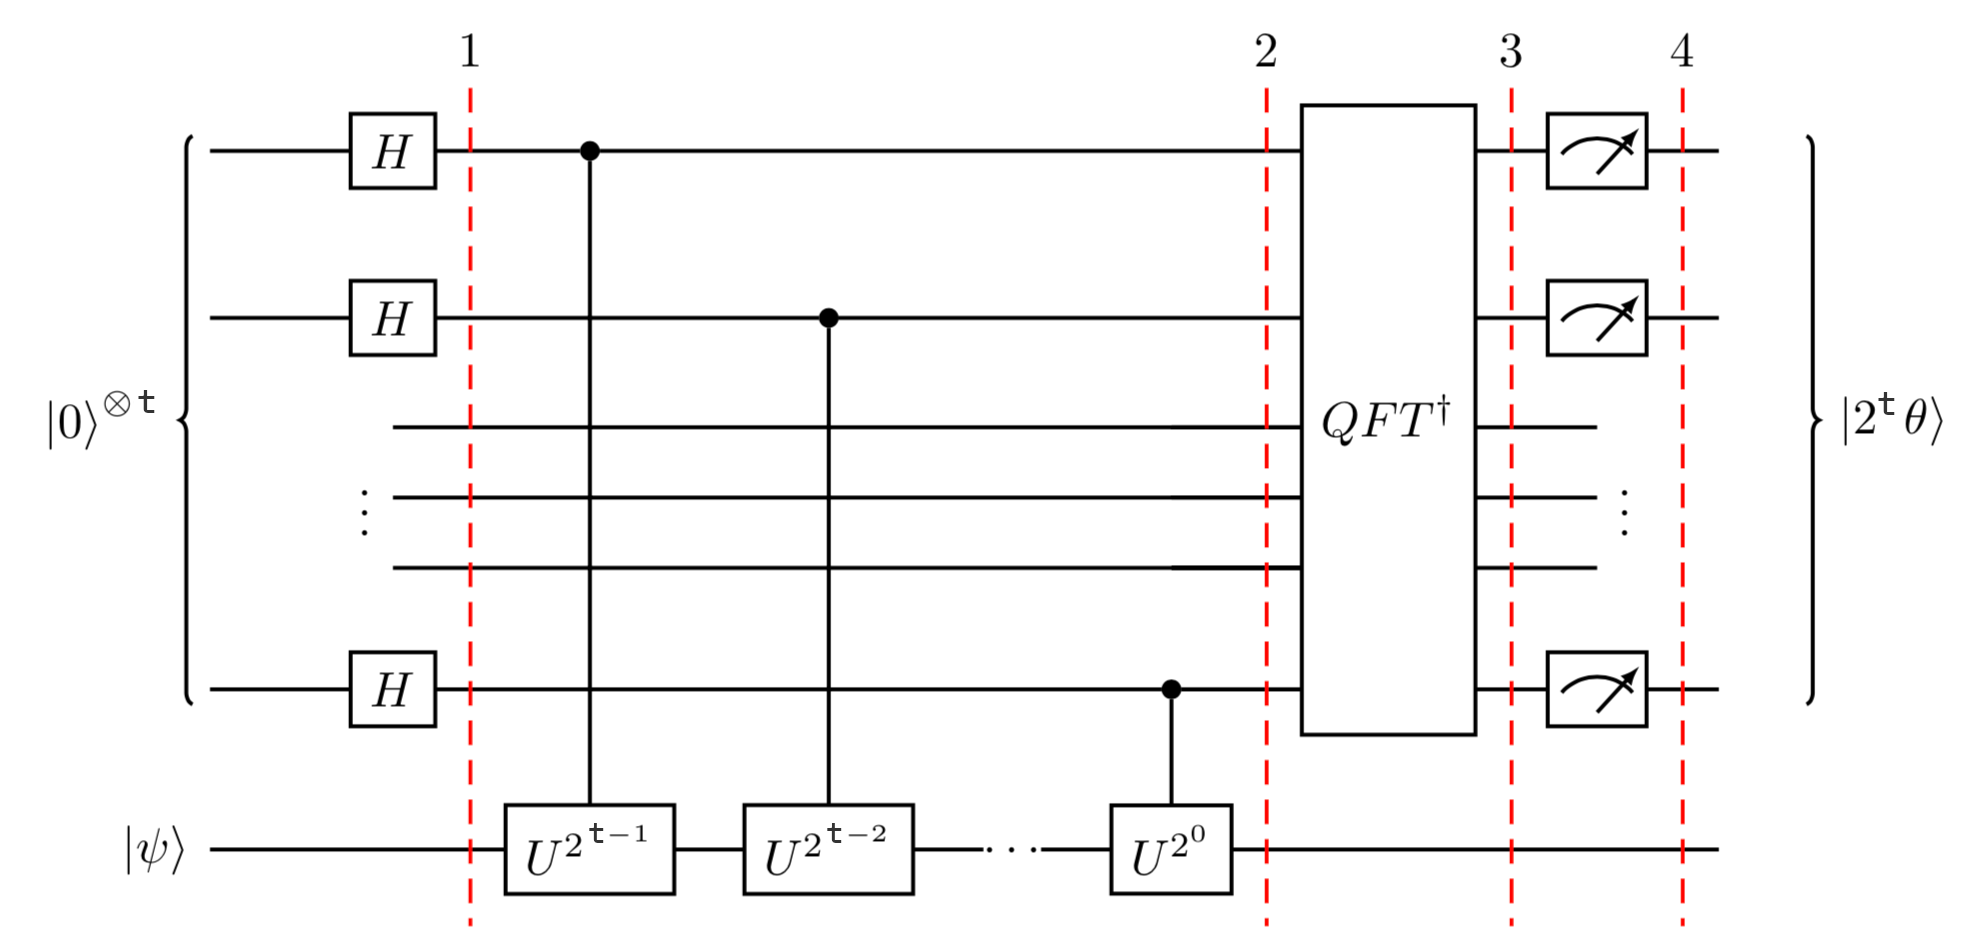

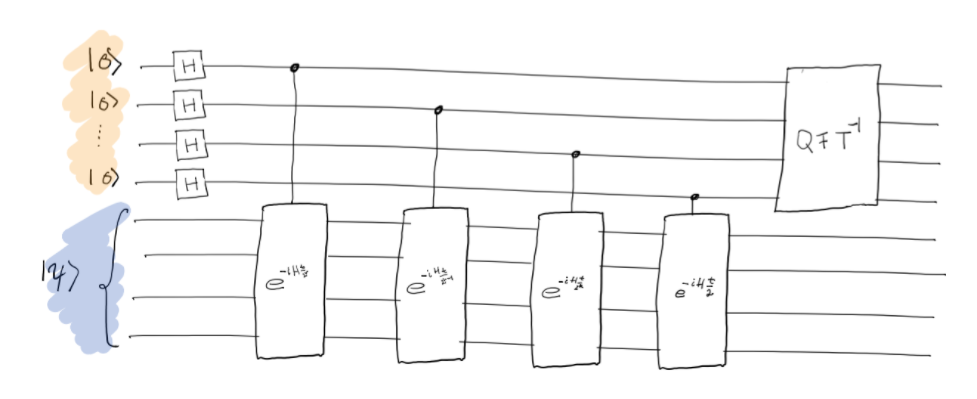

## Importing necessary libraries

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from numpy import pi

## Function for Inverse QFT

In [2]:
def qft_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/float(2**(j-m)), m, j)
        qc.h(j)

## Function to Compute QPE

In [3]:
# Function to calculate QPE
# Target Qubits helps to rotate the First Register Qubits with appropriate phase
# Control Qubit is the First Register Qubits
def qpe_main(circuit, angle, target_qubits):
    repetitions = 1
    for control_qubit in range(target_qubits):
        for i in range(repetitions):
            circuit.cp(angle, control_qubit, target_qubits);
        repetitions *= 2

## QPE Code to Find S Gate Phase Value of 1/4

Example to extract the eigenvalue of the single-qubit quantum $S$ gate :

Remember that the expected $\theta$ is:

$$S|1\rangle = e^\frac{i\pi}{2}|1\rangle\rightarrow QPE|1\rangle = e^{2\pi i \theta}|1\rangle$$

If we compare both expressions above and solve the linear equation of one incognita that arises, we obtain $\theta=\frac{1}{4}$.

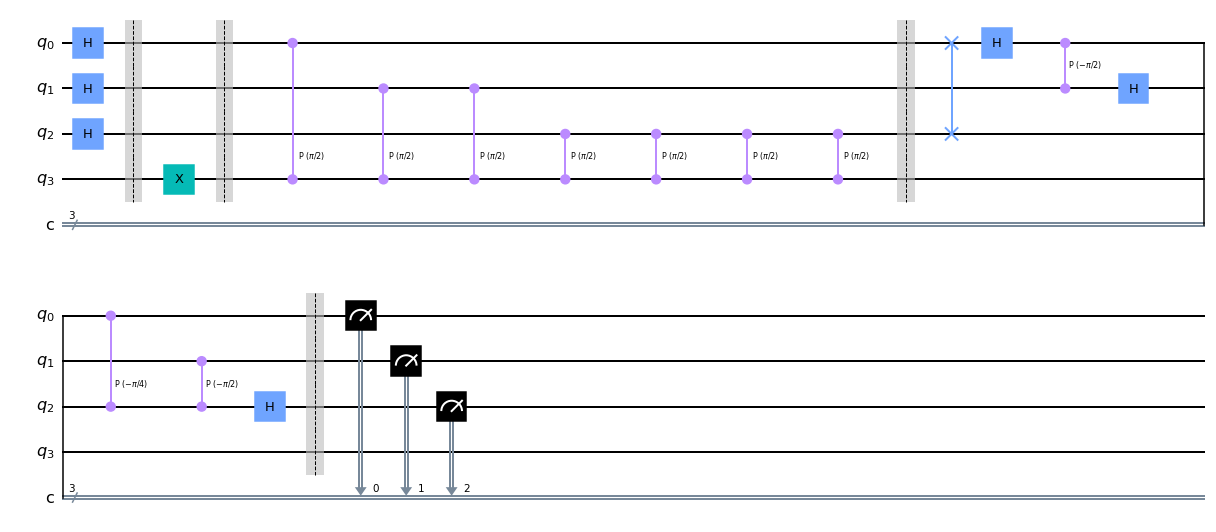

In [4]:
#this angle is the same as in the matrix of S Gate
angle = pi/2 

# initialize our Quantum Circuit
qpe = QuantumCircuit(4, 3)

# Apply Hadamards to the First Register Qubits (Counting Register)
for i in range(3):
    qpe.h(i)
qpe.barrier()

# Initialize the Second Register to |1>
qpe.x(3)
qpe.barrier()

# Apply the QPE Function
qpe_main(qpe, angle, 3) 
qpe.barrier()

# Apply the Inverse QFT
qft_dagger(qpe, 3)
qpe.barrier()

# Measure all the First Register Qubits which stores the Phase value
for i in range(3):
    qpe.measure(i, i)

# Visualize our Circuit
qpe.draw('mpl')

## Simulating the QPE for S Gate Circuit


Total counts are: {'010': 1000}


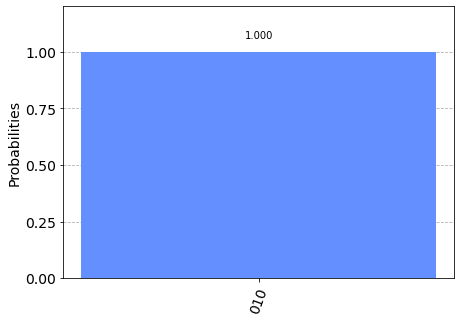

In [5]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qpe, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qpe)
print("\nTotal counts are:",counts)

# Plot the histogram
plot_histogram(counts)

We have obtained the expected result! We obtain $010_{binary} = 0\cdot(2^{2})+1\cdot(2^{1})+0\cdot(2^{0}) = 2_{decimal}$. The solution is $\frac{solution}{2^n}$. So, substituing the answer is: $\frac{2}{2^3}= \frac{1}{4}$. The expected theta!

## QPE for General $\theta$

The following code is intended to use the QPE algorithm for a generalized $\theta$ and solve the phase of the follwing operator for the $|1\rangle$ state:

$$ U = \begin{pmatrix}
1 & 0 \\
0 & e^{\frac{2\pi i}{5}}
\end{pmatrix}$$

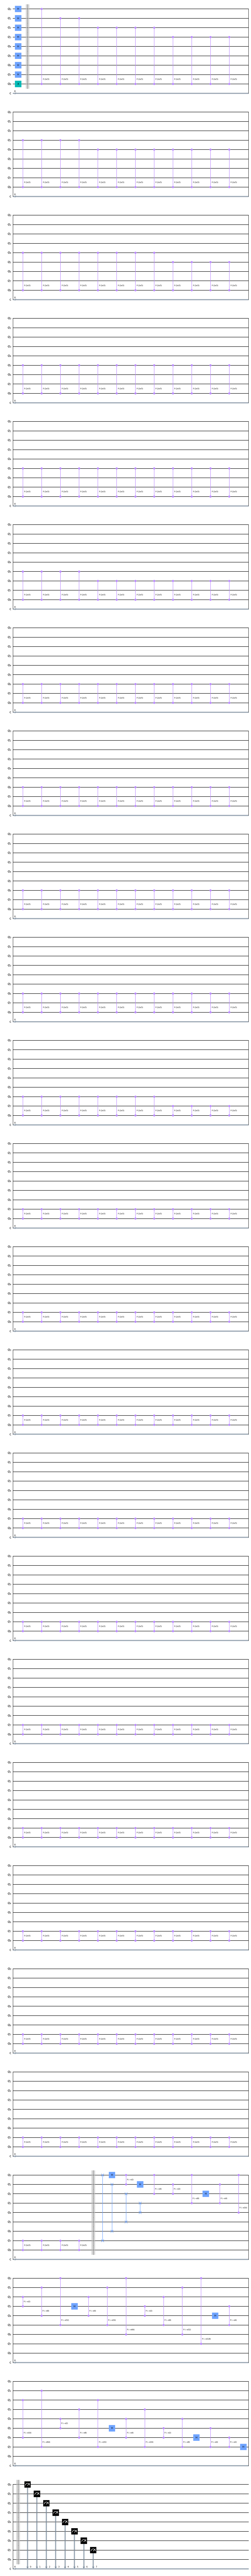

In [6]:
# Another example of a generalizing QPE algorithm for a phase factor of 1/5

# We would require 8 qubits to have a precision of thousandth (10^-3)

angle = 2*pi/5 #this angle is the same as in the matrix
control_qubits = 8

# initialize our QuantumCircuit
qpe_1 = QuantumCircuit(control_qubits+1, control_qubits)

# Apply Hadamards to the First Register Qubits (Counting Register)
for i in range(control_qubits):
    qpe_1.h(i)

# Initialize the Second Register to |1>
qpe_1.x(control_qubits)
qpe_1.barrier()

# Apply the QPE Function
qpe_main(qpe_1, angle, control_qubits) # Calling the QPE Function
qpe_1.barrier()

# Apply the Inverse QFT
qft_dagger(qpe_1, control_qubits)
qpe_1.barrier()

# Measure all the First Register Qubits which stores the Phase value
for i in range(control_qubits):
    qpe_1.measure(i, i)

# Visualize our Circuit
qpe_1.draw('mpl')


Total counts are: {'00101101': 1, '00110011': 870, '00101110': 3, '00110010': 24, '00101100': 1, '00110100': 60, '00110101': 8, '00101011': 3, '10000010': 1, '00111000': 3, '00011000': 1, '00110111': 4, '00110001': 10, '00101111': 2, '01110010': 1, '01001000': 1, '01000001': 2, '00110000': 3, '00101000': 1, '00111110': 1}


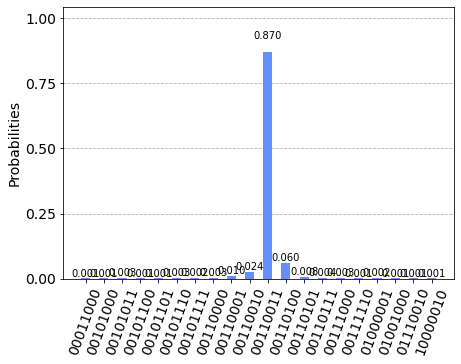

In [7]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qpe_1, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qpe_1)
print("\nTotal counts are:",counts)

# Plot the histogram
plot_histogram(counts)

We have obtained the expected result! We obtain $00110010_{binary} = 50_{decimal}$. The solution is $\frac{solution}{2^n}$. So, substituing the answer is: $\frac{50}{2^8}= \frac{50}{256} = 0.195$. Appriximately $0.2$. The expected theta was $\frac{1}{5}= 0.2$. So, we got our expected theta!